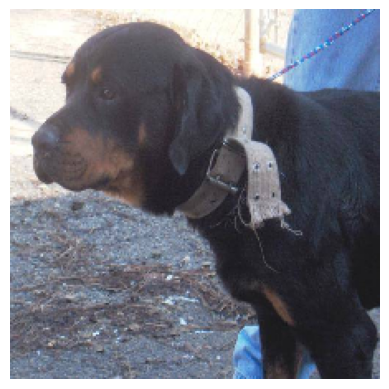

1/1 [==============================] - 1s 638ms/step
Predictions:
Rottweiler: 63.76%
Gordon_setter: 24.30%
Greater_Swiss_Mountain_dog: 6.43%


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# MobileNet 모델 불러오기
model = MobileNet(weights='imagenet')

# 이미지 경로
image_path = "/content/drive/MyDrive/dog.4951.jpg"

# 이미지 사이즈 조정 및 전처리
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array), img

# 이미지 분류 함수
def classify_image(image_path):
    preprocessed_image, img = preprocess_image(image_path)
    predictions = model.predict(preprocessed_image)
    decoded_predictions = decode_predictions(predictions, top=3)[0]
    return decoded_predictions, img

# 이미지 분류 및 결과 출력
def classify_and_display_result(image_path):
    try:
        # 이미지 표시
        _, img = preprocess_image(image_path)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

        # 분류
        predictions, _ = classify_image(image_path)
        print("Predictions:")
        for _, label, confidence in predictions:
            print(f"{label}: {confidence * 100:.2f}%")
    except Exception as e:
        print("Error:", e)

# 이미지 분류 및 결과 출력
classify_and_display_result(image_path)

